Pythonで確率分布をプロットする（interactive版）
======
***

## 1. 準備
---

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from ipywidgets import interact
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12, 6)

# matplotlibでTexをラベルに使うため
from matplotlib import rc
rc('font', size=14)
rc('text', usetex=True)

$ sudo apt-get install dvipng

が必要かも。
https://stackoverflow.com/questions/11354149/python-unable-to-render-tex-in-matplotlib

## 2. 離散型確率分布
---

### 2.0. 離散型確率分布の確率質量関数PMFと累積分布関数CDFをプロットする関数

In [2]:
def plot_discrete(func, k_max=20):
    """ 与えられた離散型確率分布関数のPMFとCDFをプロットする
        - func: 離散型確率分布関数(scipy.stats.distributions.rv_frozen)
        - k_max: 横軸(確率変数)の最大値(0からk_maxまでプロット)
    """
    # 横軸
    k = np.arange(k_max)
    
    # 確率質量関数PMF
    plt.bar(k, func.pmf(k), color="blue", width=1.0, lw="2", edgecolor="blue",label="Probability mass function", alpha=0.3, align="center")
    
    # 累積分布関数CDF
    plt.step(k, func.cdf(k), color="orange", lw="2", label="Cumulative distribution function", alpha=0.8, where="post")

    # グラフ設定
    plt.grid()
    plt.legend(loc="upper left", frameon=False)
    plt.xticks(k) # 横軸の目盛り
    plt.xlim((-0.5, k_max-0.5))
    plt.ylim((0.0, 1.0))
    plt.xlabel("$k$")
    plt.ylabel("$P(X=k), \:\: P(X \leq k)$")

### 2.1 二項分布（Binomial distribution）
> 結果が成功か失敗のいずれかである n 回の独立な試行を行ったときの成功数で表される離散確率分布
>
> [二項分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83)

#### 確率質量関数
パラメータ $p \: (0 \leq p \leq 1), \:, n \in \mathbb{N}$ に対し、
$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} \:\: (k=0, 1, ..., n)
$$

$n=1$ の場合をベルヌーイ分布と呼ぶ。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = np,\: V[X] = np(1-p)
$$

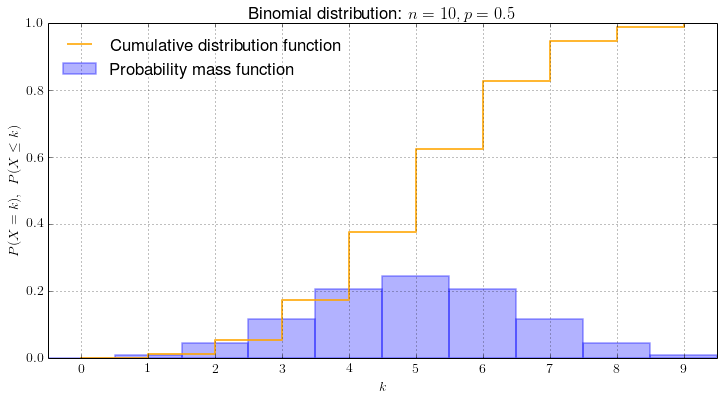

In [3]:
@interact(n=(0, 20), p=(0.0, 1.0), k_max=(5, 15))
def plot_binomial(n, p, k_max):
    plot_discrete(stats.binom(n, p), k_max)
    plt.title("Binomial distribution: $n=%d,p= %.1f$" % (n, p))
    
# 以下のように1行でも記述できるが、読みやすさを優先した（以下同様）
#interact(lambda n, p, k_max: plot_discrete(stats.binom(n, p), k_max), n=(0, 20), p=(0.0, 1.0), k_max=(5, 15))

### 2.2. ポアソン分布（Poisson distribution）
> 所与の時間間隔で発生する離散的な事象を数える特定の確率変数 X を持つ離散確率分布
>
> [ポアソン分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83)

#### 確率質量関数
定数 $\lambda > 0$ に対し、
$$
P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \lambda,\: V[X] = \lambda
$$

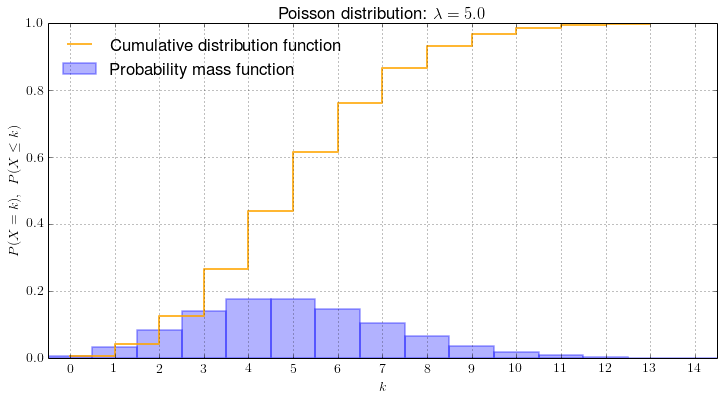

In [4]:
@interact(lambda_=(0.0, 10.0), k_max=(10, 20))
def plot_poisson(lambda_, k_max):
    plot_discrete(stats.poisson(lambda_), k_max)
    plt.title("Poisson distribution: $\lambda = %.1f$" % lambda_)

### 2.3. 幾何分布（Geometric distribution）
> ベルヌーイ試行を繰り返して初めて成功させるまでの試行回数 X の分布
>
> [幾何分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

#### 確率質量関数
成功率 $p \: (0 \leq p \leq 1)$ である独立ベルヌーイ試行に対し、
$$
P(X=k) = p(1-p)^{k-1} \:\: (k=1, 2, 3, ...)
$$


#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{1}{p},\: V[X] = \frac{(1-p)}{p^2}
$$

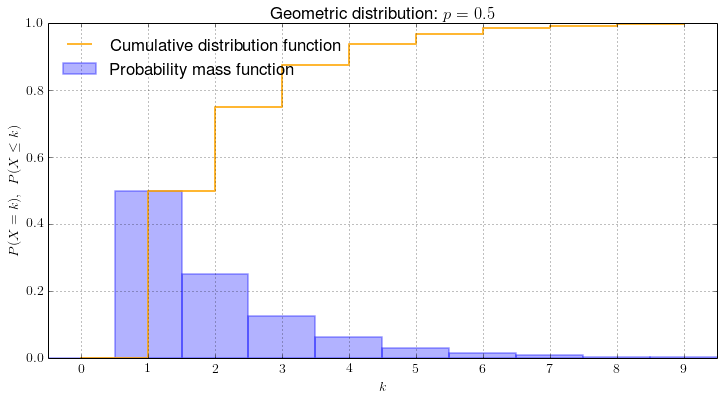

In [5]:
@interact(p=(0.0, 1.0), k_max=(5, 15))
def plot_geom(p, k_max):
    plot_discrete(stats.geom(p), k_max)
    plt.title("Geometric distribution: $p = %.1f$" % p)

### 2.4. 負の二項分布（Negative Binomial distribution）
定義が複数あってややこしいので、scipy.stats.nbinomの仕様にあわせる。
>  A sequence of i.i.d. Bernoulli trials, repeated until a predefined, non-random number of successes occurs.
>
> (独立同一分布に従うベルヌーイ試行を行ったとき、r回の成功をする前に失敗した回数の分布)
> 
> [scipy.stats.nbinom](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.nbinom.html)

#### 確率質量関数
成功率 $p \: (0 \leq p \leq 1)$ である独立ベルヌーイ試行に対し、$r \: (1 \leq r)$ 回の成功をする前に失敗した試行回数Xについて
$$
P(X=k) = \binom{k+r-1}{r-1} p^{r}(1-p)^{k}
$$

$r=1$ のとき幾何分布になる。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{(1-p)r}{p},\: V[X] = \frac{(1-p)r}{p^2}
$$

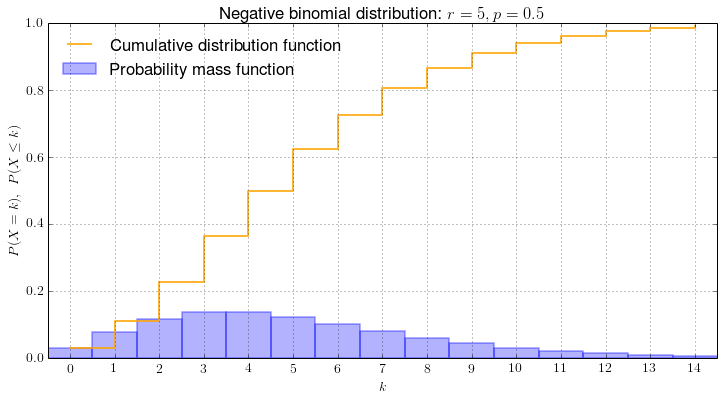

In [6]:
@interact(r=(1, 10), p=(0.0, 1.0), k_max=(10, 20))
def plot_nbinom(r, p, k_max):
    plot_discrete(stats.nbinom(r, p), k_max)
    plt.title("Negative binomial distribution: $r=%d, p = %.1f$" % (r, p))

### 2.5. 超幾何分布（Hypergeometric distribution）
> 成功状態をもつ母集団から非復元抽出したときに成功状態がいくつあるかという確率を与える離散確率分布
>
> [超幾何分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E8%B6%85%E5%B9%BE%E4%BD%95%E5%88%86%E5%B8%83)

#### 確率質量関数
$K$ 個の成功状態をもつ $N$ 個の要素よりなる母集団から $n$ 個の要素を非復元抽出したときに $k$ 個の成功状態が含まれている確率
$$
P(X=k) = \frac{ \binom{K}{k} \binom{N-K}{n-k} }{\binom{N}{n}}
$$

確率質量関数は $max(0, n + K - N) ≤ k ≤ min(K, n)$のとき正となる。

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{nK}{N},\: V[X] = \frac{(N-n)n(N-K)K}{(N-1)N^2 }
$$

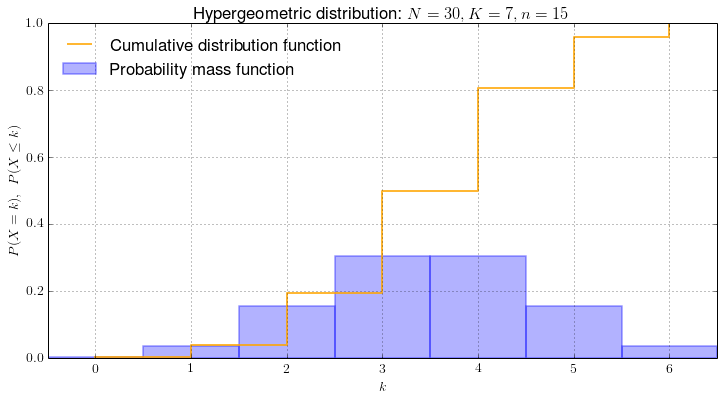

In [7]:
@interact(N=(20,40), K=(5,10), n=(10,20), k_max=(5, 10))
def plot_hypergeom(N, K, n, k_max):
    plot_discrete(stats.hypergeom(N, K, n), k_max)
    plt.title("Hypergeometric distribution: $N=%d, K=%d, n=%d$" % (N ,K, n))

### 2.6. 一様分布（Uniform distribution）
> サイコロを振ったときの、それぞれの目の出る確率など、すべての事象の起こる確率が等しい現象のモデル
>
> [一様分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%B8%80%E6%A7%98%E5%88%86%E5%B8%83)

#### 確率質量関数
$N \in \mathbb{N}$に対し、
$$
P(X=k) = \frac{1}{N}, \:\: (k=1, 2, ..., N)
$$

#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{N+1}{2},\: V[X] = \frac{(N^2 - 1)}{12}
$$

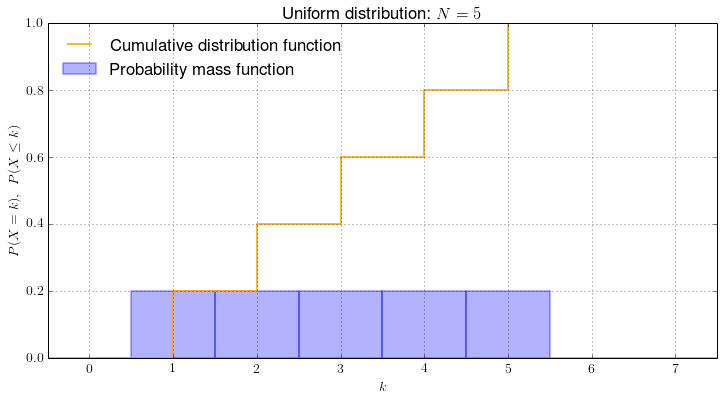

In [9]:
@interact(N=(1, 10), k_max=(1, 15))
def plot_uniform(N, k_max):
    plot_discrete(stats.randint(1, N+1), k_max)
    plt.title("Uniform distribution: $N=%d$" % N)

## 3. 連続型確率分布
---

### 3.0. 連続型確率分布の確率密度関数PDFと累積分布関数CDFをプロットする関数

In [10]:
def plot_continuous(func, x_min=0, x_max=5, y_max=1.0):
    """ 与えられた連続型確率分布関数のPDFとCDFをプロットする
        - func: 連続型確率分布関数(scipy.stats.distributions.rv_frozen)
        - x_min, x_max: 横軸の領域(x_minからx_maxまでプロット)
    """
    # 横軸
    x = np.linspace(x_min, x_max, 100)
    
    # 確率密度関数PDF
    plt.plot(x, func.pdf(x), color="blue", lw="2", label="Probability density function", alpha=0.6)
    plt.fill_between(x, func.pdf(x), color="blue", alpha=0.3)
    
    # 累積分布関数CDF
    plt.plot(x, func.cdf(x), lw="2", color="orange", label="Cumulative distribution function", alpha=0.6)

    # グラフ設定
    plt.grid()
    plt.legend(loc="upper left", frameon=False)
    plt.xticks(np.arange(x_min, x_max+1)) # 横軸の目盛り
    plt.xlim((x_min, x_max))
    plt.ylim((0.0, y_max))
    plt.xlabel("$x$")
    plt.ylabel("$f(x), \:\: F(x)$")

### 3.1. 正規分布（Normal distribution）
> 平均値の付近に集積するようなデータの分布を表した連続的な変数に関する確率分布
>
> [正規分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83)

#### 確率密度関数
- 平均 $\mu$ , 分散 $\sigma ^2$ に対し、
$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}} exp \left( - \frac{(x-\mu)^2}{2\sigma ^2} \right) \:\: (x \in \mathbb{R})
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \mu,\: V[X] = \sigma^2
$$

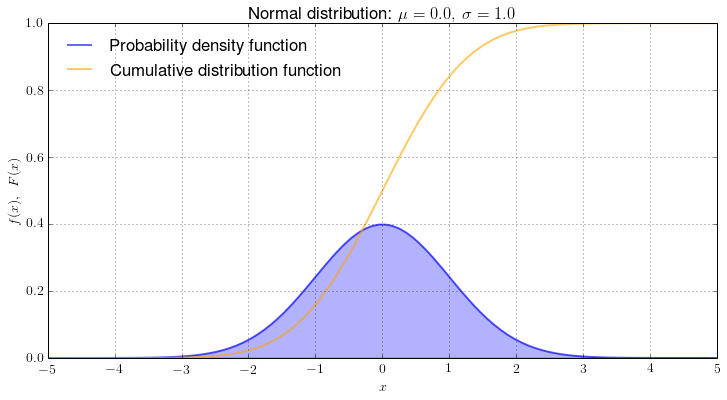

In [19]:
@interact(mu=(-2.0, 2.0), sigma=(0.0, 2.0), x_max=(1, 10))
def plot_norm(mu, sigma, x_max):
    plot_continuous(stats.norm(loc=mu, scale=sigma), -x_max, x_max)
    plt.title("Normal distribution: $ \mu = %.1f,\: \sigma = %.1f$" % (mu, sigma))
    
# 以下のように1行でも記述できるが、読みやすさを優先した（以下同様）
#interact(lambda mu, sigma, x_max: plot_continuous(stats.norm(mu, sigma), x_max), mu=(-2.0, 2.0), sigma=(0.0, 2.0), x_max=(1, 10))

### 3.2. 指数分布（Exponential distribution）
> 或る離散的な事象に対して、ポアソン分布が単位時間当たりの生起確率を示し、指数分布は生起期間の確率を示す
>
> [指数分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数 $\lambda > 0$ に対し、
$$
\begin{eqnarray}
f(x) =\left\{ \begin{array}{ll}
\lambda e^{-\lambda x} & (x \geq 0) \\
0 & (x < 0) \\
\end{array} \right.
\end{eqnarray}
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{1}{\lambda}, \: V[X] = \frac{1}{\lambda ^2}
$$ 

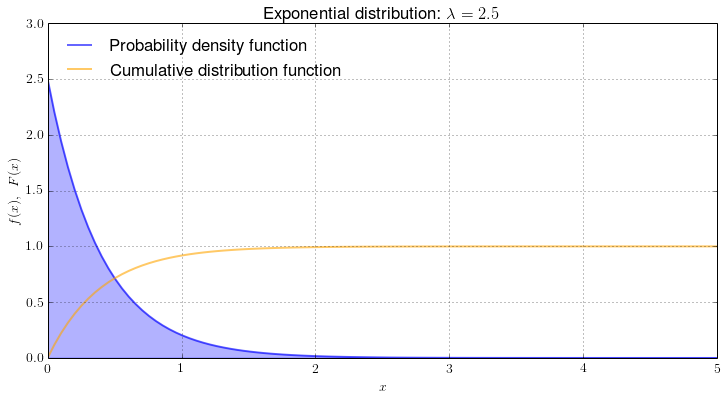

In [12]:
@interact(lambda_=(0.0, 5.0), x_max=(1, 10), y_max=(1, 5))
def plot_exponential(lambda_, x_max, y_max):
    plot_continuous(stats.expon(scale=1.0/lambda_), x_min=0, x_max=x_max, y_max=y_max)
    plt.title("Exponential distribution: $ \lambda = %.1f$" % lambda_)

### 3.3. ガンマ分布（Gamma distribution）
指数分布を一般化したもの。
> 形状母数 k、尺度母数 θ の2つのパラメータ で特徴づけられる。主に信頼性工学における電子部品の寿命分布や通信工学におけるトラフィックの待ち時間分布に応用される。また所得分布にも応用される。
>
> [ガンマ分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%AC%E3%83%B3%E3%83%9E%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数 $\lambda, \alpha > 0$ に対し、

\begin{eqnarray}
f(x) =\left\{
\begin{array}{ll}
\frac{\lambda^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\lambda x} & (x\geq0) \\
0 & (x < 0) \\
\end{array} \right.
\end{eqnarray}

ここで、$\Gamma(\alpha)$はガンマ関数（階乗の一般化）で、

$$
\Gamma(\alpha) = \int_0^\infty  x^{\alpha-1} e^{-x} dx
$$

である。ガンマ分布はガンマ関数で規格化されている感じ。

$\alpha$が自然数なら$\Gamma(\alpha) = (\alpha-1)!$

#### 平均・分散
この分布$Ga(\alpha, \lambda)$に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{\alpha}{\lambda}, \: V[X] = \frac{\alpha}{\lambda ^2}
$$ 

#### 性質
- $\alpha = 1$なら指数分布になる。
- $\alpha$が整数ならアーラン分布になる（参考：このとき$\Gamma(\alpha) = (\alpha-1)!$）。これは$\alpha$個の独立な指数分布の和になり、ある事象が$\alpha$回生起するまでの待ち時間の分布になる。（ex: 5回システムが故障するまでの間隔の分布）
- $Ga(\frac{n}{2}, \frac{1}{2})$は自由度$n$の$\chi^2$(カイ二乗)分布に帰着する。

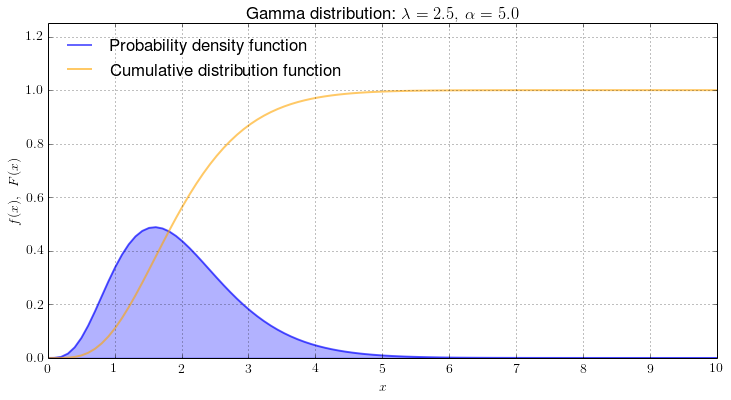

In [13]:
@interact(lambda_=(0.0, 5.0), alpha=(1,10), x_max=(1, 20), y_max=(0.5, 2))
def plot_gamma(lambda_, alpha, x_max, y_max):
    plot_continuous(stats.gamma(alpha, scale=1.0/lambda_), x_min=0, x_max=x_max, y_max=y_max)
    # \alphaや\betaがエラーになるので、\\alphaのようにする
    # 参考：https://stackoverflow.com/questions/7836730/latex-on-python-alpha-and-beta-dont-work
    plt.title("Gamma distribution: $ \lambda = %.1f, \: \\alpha= %.1f $" % (lambda_, alpha))

### 3.4. ベータ分布(Beta distribution)
[ベータ分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%99%E3%83%BC%E3%82%BF%E5%88%86%E5%B8%83)



#### 確率密度関数
- 定数 $\alpha, \beta > 0$ に対し、

\begin{eqnarray}
f(x) =\left\{
\begin{array}{ll}
\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} & (0 \leq x \leq 1) \\
0 & (それ以外) \\
\end{array} \right.
\end{eqnarray}

ここで、$B(\alpha, \beta)$はベータ関数で、

$$
B(\alpha, \beta) = \int_0^1  x^{\alpha-1} (1-x)^{\beta-1} dx, \:\:\: (\alpha > 0, \beta > 0)
$$

また、ガンマ関数とは以下の関係にある。
$$
B(\alpha, \beta) = \frac{\Gamma (\alpha) \Gamma (\beta)}{\Gamma (\alpha + \beta)}
$$

#### 平均・分散
この分布$Beta(\alpha, \beta)$に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{\alpha}{\alpha + \beta}, \: V[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$ 

#### 性質
- $\alpha = \beta = 1$のときは一様分布
- イメージ:（ベイズ統計学で重要になる）
> Thus, the Beta distribution is best for representing a probabilistic distribution of probabilities- the case where we don't know what a probability is in advance, but we have some reasonable guesses.
>
> http://postd.cc/one-year-as-a-data-scientist-at-stack-overflow/



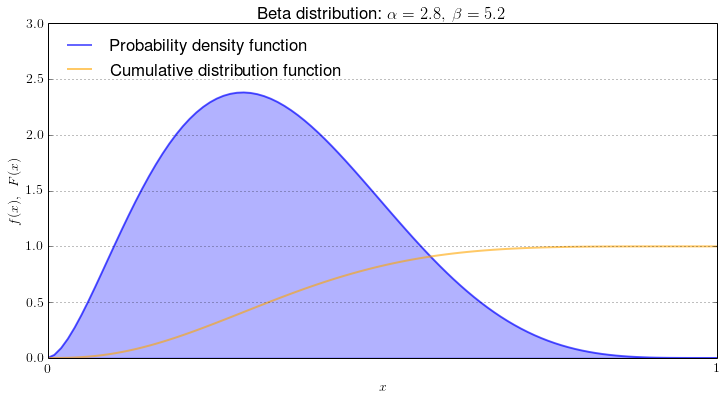

In [14]:
@interact(alpha=(0.5,5), beta=(0.5,10), y_max=(1, 5))
def plot_beta(alpha, beta, y_max):
    plot_continuous(stats.beta(alpha, beta), x_min=0, x_max=1, y_max=y_max)
    plt.title("Beta distribution: $ \\alpha= %.1f, \: \\beta= %.1f $" % (alpha, beta))

### 3.5. コーシー分布(Cauchy distribution)
> コーシー分布は、期待値や分散（あるいはより高次のモーメント）が定義されない分布の例として知られる。
>
> [コーシー分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%BC%E3%82%B7%E3%83%BC%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数 $\alpha > 0$ に対し、

$$
f(x) = \frac{\gamma}{\pi\{(x-x_0)^2 + \gamma^2\}}
$$

ここで、$x_0$は分布の最頻値を与える位置母数、$\gamma$は半値半幅を与える尺度母数である。

#### 平均・分散
存在しない。最頻値と中央値は常に定義され、それらはいずれも$x_0$で与えられる。

モーメント母関数も存在しない。

#### 性質
- $x_0 = 0、\gamma=1$である場合、この分布は標準コーシー分布と呼ばれ、以下の形になる。

$$
f(x) = \frac{1}{\pi(1+x^2)}
$$

- 安定分布（レヴィ安定分布）で、$\alpha=2$の場合が正規分布、$\alpha=1, \beta=0$の場合がコーシー分布。

> α は分布の裾の厚みの尺度であり、小さいほど裾が広い ( [安定分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E5%AE%89%E5%AE%9A%E5%88%86%E5%B8%83))


> マンデルブロは実際の市場のリターンについて、α値が1と2のあいだになると考えた(「ウォール街の物理学者」)

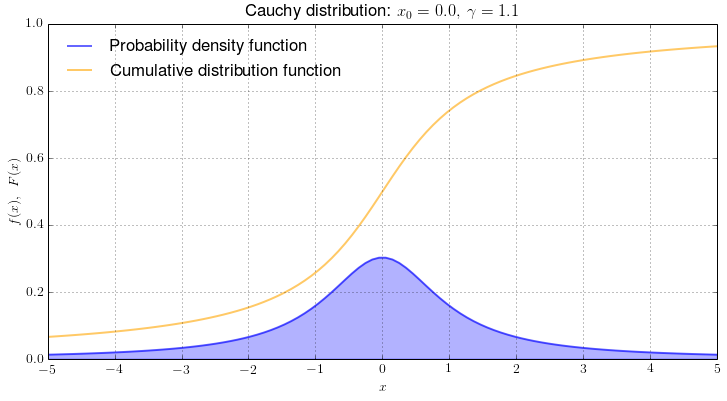

In [15]:
@interact(x0=(-2, 2), gamma=(0.1,2), x_max=(1,10))
def plot_cauchy(x0, gamma, x_max):
    plot_continuous(stats.cauchy(loc=x0, scale=gamma), x_min=-x_max, x_max=x_max, y_max=1)
    plt.title("Cauchy distribution: $ x_0 = %.1f, \: \gamma= %.1f $" % (x0, gamma))

### 3.6. 対数正規分布(Log-normal distribution)
> この分布に従う確率変数の対数をとったとき、対応する分布が正規分布に従うものとして定義される。そのため中心極限定理の乗法的な類似が成り立ち、独立同分布に従う確率変数の積は漸近的に対数正規分布に従う。
>
> [対数正規分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E5%AF%BE%E6%95%B0%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83)

#### 確率密度関数
- パラメータ $\mu, \sigma ^2$ に対し、
$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}} exp \left( - \frac{(log x-\mu)^2}{2\sigma ^2} \right), \:\: 0 < x < \infty
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = e^{\mu + \frac{\sigma^2}{2}},\: V[X] = e^{2\mu + \sigma^2} (e^{\sigma^2}- 1)
$$

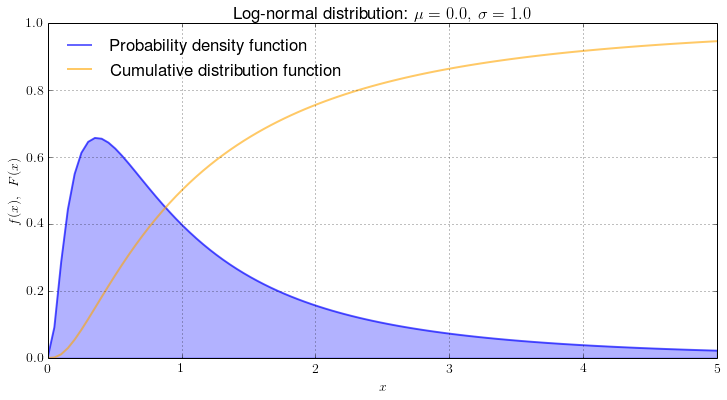

In [20]:
@interact(mu=(-2.0, 2.0), sigma=(0.0, 2.0), x_max=(1,10))
def plot_lognorm(mu, sigma, x_max):
    plot_continuous(stats.lognorm(sigma, loc=mu), x_min=0, x_max=x_max, y_max=1)
    plt.title("Log-normal distribution: $ \mu = %.1f, \: \sigma= %.1f $" % (mu, sigma))

### 3.7. パレート分布(Pareto distribution)

> イタリアの経済学者ヴィルフレド・パレート (Vilfredo Pareto) が所得の分布をモデリングする分布として提唱した連続型の確率分布である。離散型はゼータ分布（ジップ分布）である。
>
> [パレート分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%AC%E3%83%BC%E3%83%88%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数$a>0, b>0$に対し、実数$x (x \geq b)$を確率変数とするとき
$$
f(x) = \frac{a}{b} (\frac{b}{x})^{a+1}, \:\: x \geq b
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = \frac{ab}{a-1} \: (a>1), \:\: V[X] = \frac{ab^2}{(a-1)^2(a-2)} \: (a>2)
$$


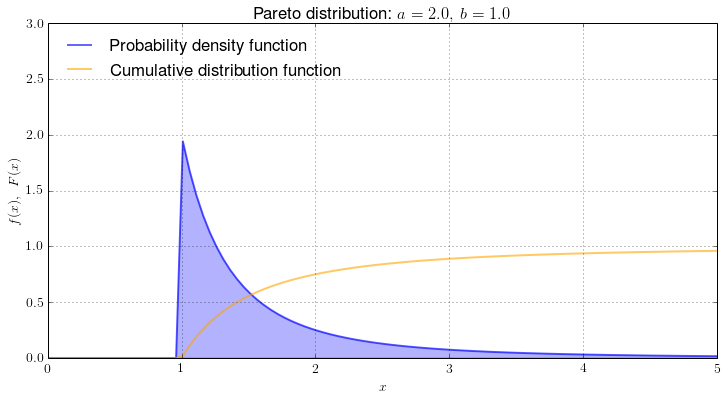

In [17]:
@interact(a=(0, 5), b=(0.0, 2.0), x_max=(1,10), y_max=(1,5))
def plot_pareto(a, b, x_max, y_max):
    plot_continuous(stats.pareto(a, loc=b-1), x_min=0, x_max=x_max, y_max=y_max)
    plt.title("Pareto distribution: $ a = %.1f, \: b= %.1f $" % (a, b))

### 3.8. ワイブル分布(Weibull distribution)

> 物体の強度を統計的に記述するためにW.ワイブル（Waloddi Weibull）によって提案された確率分布。時間に対する劣化現象や寿命を統計的に記述するためにも利用される。
>
> [ワイブル分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%AF%E3%82%A4%E3%83%96%E3%83%AB%E5%88%86%E5%B8%83)

#### 確率密度関数
- 定数$a>0, b>0$に対し、
$$
f(x) = \frac{b}{a} (\frac{x}{a})^{b-1} \: exp \bigl\{ - (\frac{x}{a})^b \bigr\}, \:\: x \geq 0
$$



#### 平均・分散
この分布に従う確率変数Xの平均・分散は、
$$
E[X] = a \Gamma (1 + \frac{1}{b}), \:\: V[X] = a^2 \biggl\{  \Gamma (1 + \frac{2}{b}) - \bigl[\Gamma (1 + \frac{1}{b}) \bigr]^2 \biggr\}
$$

#### 性質
- 共通一次試験の得点分布は正規分布に似ているが、ワイブル分布の方があてはまるらしい(「統計学入門」)

- 瞬間故障率が一定なら耐用年数や寿命は指数分布に従うが、(1)初期故障の時期には故障率の減少が起こったり、(2)長期間使用すると劣化が進行し故障率が増加すると仮定する（バスタブ曲線）と、指数分布には従わない。このようなときにワイブル分布が使える。
（http://www.ntrand.com/jp/weibull-distribution/）

- >経済学においては倒産のモデル化等に，医学においては術後の病気の再発のモデル化等に用いられる．また，気象学においては風速の分布を確率変数とみなしたとき，その確率変数が従う分布がワイブル分布であるとしている．（http://data-science.gr.jp/theory/tpd_weibull_distribution.html）

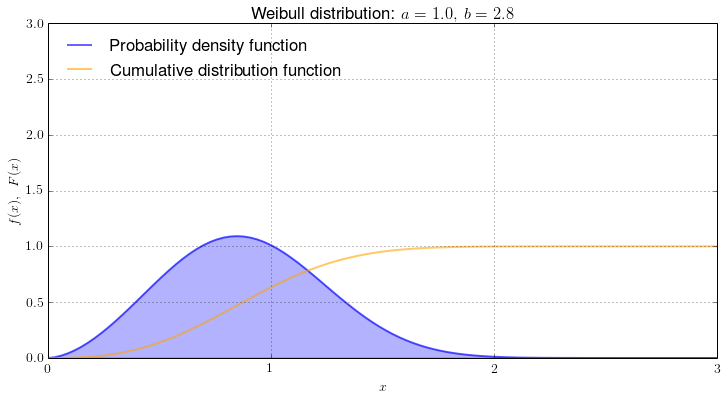

In [18]:
@interact(a=(0, 2), b=(0.5, 5.0), x_max=(1,5), y_max=(1,5))
def plot_weibull(a, b, x_max, y_max):
    plot_continuous(stats.weibull_min(b, scale=a), x_min=0, x_max=x_max, y_max=y_max)
    plt.title("Weibull distribution: $ a = %.1f, \: b= %.1f $" % (a, b))